<a href="https://colab.research.google.com/github/dorienh/computational_data_science/blob/master/lab10a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training a word2vec model from scratch

-- Prof. Dorien Herremans

We will start by training a word2vec model from scratch using the gensim library. You will need to ensure that you have gensim installed, and a file decompressor to load our dataset. 

Note: these models may take a while to train. If your computer is very slow, you may want to use Google Colab. 

In [0]:
# if you need to install: 
# !pip install gensim

# imports needed 
import gzip
import gensim 

We will train our model using a very small dataset for demonstrative purposes. Note that for a real data science project you should train on a much larger dataset. 

We will use the complete works of Shakespeare. You can download the txt file at http://dorienherremans.com/drop/cds/ (don't forget the trailing /)

If you use Colab, a quick way to get big data files in there is through Dropbox. Use the below script to move. **Those of you running this on your own machine or using the upload function, please skip this and g to the next step.**



In [0]:
# !pip install dropbox
# import dropbox
access_token = 'your_api_code_get_at' # https://www.dropbox.com/developers/apps
dbx = dropbox.Dropbox(access_token)

# response = dbx.files_list_folder("")

j = "/Your path in your dropbox/shakespeare.txt"
dbx.files_download_to_file('/shakespeare.txt', j)


Let's read the input file and convert each line into a list of words (tokenizing). 

In [18]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    print("reading file...")
      
    with open (input_file, 'r') as f:   
        lines = f.readlines()
        for line in lines:
            # do some pre-processing and return a list of words for each review text
            # you can print the output here to understand the preprocessing (tokenizing)
            yield gensim.utils.simple_preprocess (line)

# read the tokenized reviews into a list
# each review item becomes a series of words
# so this becomes a list of lists

# point to the location on your filesystem
data_file = 'data/shakespeare.txt'

documents = list (read_input (data_file))
print("Done reading data file")

reading file...
Done reading data file


Now let's train the word2vec model using our document variable (which is a list of word lists). Note that you can specify a number of hyperparameters below:
* min_count removes all words that occur less then min_count
* window: window size in the skip-gram
* workers: how many threads to use
* size: number of dimension of your new word embedding vector (typically 100-200). Smaller datasets require a smaller number



In [20]:
model = gensim.models.Word2Vec (documents, size=150, window=5, min_count=2, workers=4)
model.train(documents,total_examples=len(documents),epochs=10)

(6704230, 8675160)

That's it! Now you've trained the model! 

Now let's explore some properties of our new word space. You can get the words most close (read:  most similar) to a given word: 

In [21]:
w1 = "king"
model.wv.most_similar (positive=w1)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('prince', 0.6650828719139099),
 ('duke', 0.5773294568061829),
 ('warwick', 0.544701099395752),
 ('bolingbroke', 0.5413240194320679),
 ('fifth', 0.5237143635749817),
 ('ghost', 0.5168851613998413),
 ('sixth', 0.5164535641670227),
 ('emperor', 0.4842527508735657),
 ('bastard', 0.4839220941066742),
 ('plantagenet', 0.48241090774536133)]

In [22]:
# look up top 6 words similar to 'smile'
w1 = ["smile"]
model.wv.most_similar (positive=w1,topn=6)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('laugh', 0.756415605545044),
 ('blush', 0.6869995594024658),
 ('tremble', 0.6863462328910828),
 ('wink', 0.6765829920768738),
 ('grieve', 0.6550654768943787),
 ('weep', 0.649163544178009)]

In [23]:
# look up top 6 words similar to 'france'
w1 = ["france"]
model.wv.most_similar (positive=w1,topn=6)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('england', 0.6280090808868408),
 ('egypt', 0.5715603232383728),
 ('rome', 0.5670613050460815),
 ('wales', 0.5666059851646423),
 ('princess', 0.5410600304603577),
 ('orleans', 0.5397579669952393)]

In [24]:
# look up top 6 words similar to 'shocked'
w1 = ["sword"]
model.wv.most_similar (positive=w1,topn=6)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('head', 0.7731919288635254),
 ('neck', 0.6952689290046692),
 ('weapon', 0.690859854221344),
 ('knife', 0.6845294237136841),
 ('foot', 0.683414101600647),
 ('finger', 0.6791764497756958)]

In [25]:
# get everything related to stuff on the royalty
w1 = ["king",'queen','prince']
w2 = ['farmer']
model.wv.most_similar (positive=w1,negative=w2,topn=10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('duke', 0.6197916269302368),
 ('princess', 0.5565051436424255),
 ('warwick', 0.5488515496253967),
 ('emperor', 0.5200337171554565),
 ('ghost', 0.5142248868942261),
 ('cause', 0.49427151679992676),
 ('comfort', 0.49401700496673584),
 ('empress', 0.4870476722717285),
 ('bolingbroke', 0.48613566160202026),
 ('gods', 0.4674186706542969)]

Explore the similarity (e.g. distance) between two words. Does it make sense?

In [26]:
# similarity between two similar words
model.wv.similarity(w1="pretty",w2="beautiful")


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.58568496

In [27]:
# similarity between two opposing words
model.wv.similarity(w1="king",w2="farmer")


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.0011845991

Try some other combinations :) 

We can even use it to perform more 'smart' assigments: 

In [28]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["cat","dog","france"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'france'

Output the actual vector of a word: 

In [29]:
model.wv['france']

array([-1.6336242 ,  0.6392099 ,  0.04320113,  1.712516  , -1.1762713 ,
        0.67684656,  0.7460683 , -0.49846935,  1.0546505 , -0.26602426,
        1.0185709 , -0.1701143 , -0.4585758 , -0.8700818 ,  1.4620354 ,
        0.7234103 , -0.7610655 , -1.25149   , -1.2134558 , -0.04436245,
       -0.5336559 , -1.4863238 ,  0.16815951,  0.14970575,  0.54557294,
        0.40336707,  1.2183256 ,  0.28746873,  0.32489455,  1.1949903 ,
       -0.76268554, -0.49404815, -0.10707795, -0.27087703,  0.28409934,
        0.5882856 , -0.2224724 ,  1.495657  ,  0.16390805,  0.8372654 ,
        0.6657588 ,  0.29043853,  1.4440564 ,  0.3555851 , -1.0419197 ,
       -0.5357952 ,  0.6334692 ,  0.18696813,  0.88203317,  0.26346934,
       -0.9685976 ,  0.5370872 , -0.10190926,  0.26336193, -1.0946609 ,
        0.26162368, -0.04851169, -0.63192135, -0.9669038 , -0.46926823,
       -0.45433334, -0.72869784, -0.54068935, -0.74007815,  1.2149935 ,
        1.3453565 ,  0.0292472 ,  0.5851113 ,  0.19322963, -0.45

## Bonus: visualising our model in t-SNE: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


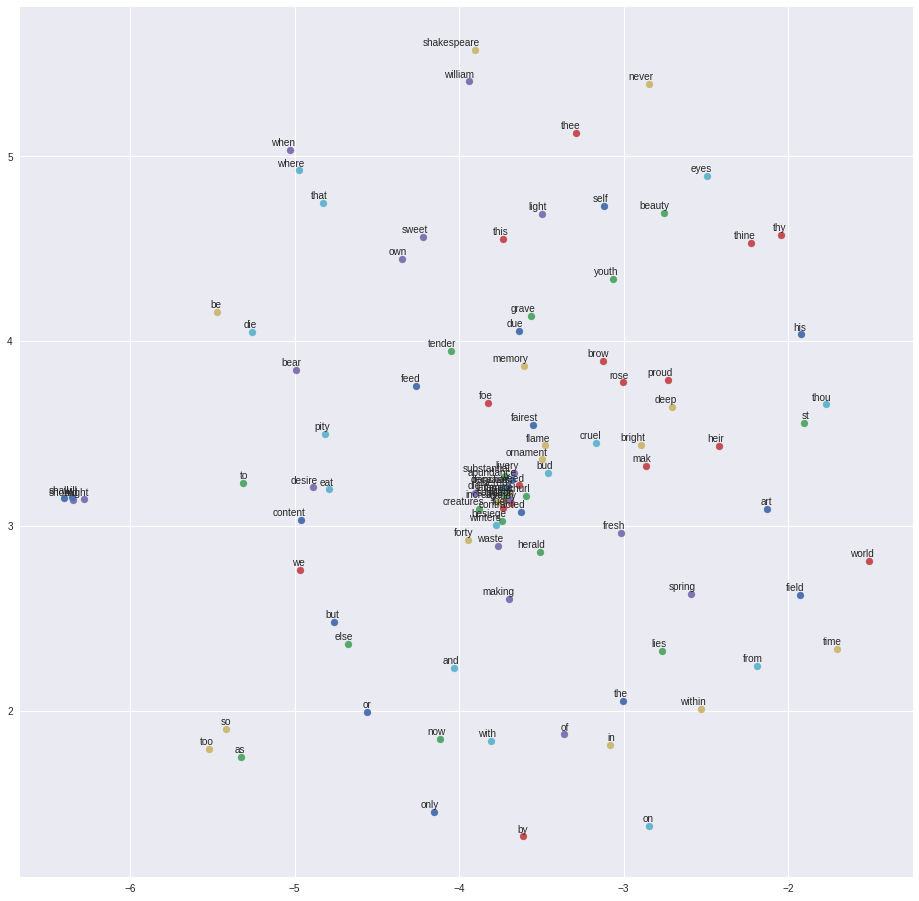

In [30]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    
    # fyi: to test specific labels instead of all the words in the vocab: 
#     labels = ['king', 'queen', 'prince', 'farmer', 'blue', 'red']
#     tokens = []
#     for label in labels: 
#         tokens.append(model[label])

    labels = []
    tokens = []
    
    count = 0
    for word in model.wv.vocab:
        # to speed up the process, let's limit to the first 100 elements
        if count < 100:
            tokens.append(model[word])
            labels.append(word)
            count = count+1

    # set the t-sne values
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne_plot(model)

## References

* https://radimrehurek.com/gensim/models/word2vec.html
* https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568
* https://github.com/kavgan/nlp-text-mining-working-examples/tree/master/word2vec
* https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5